In [246]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv('./train.csv')


# Data Cleaning

In [247]:
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [248]:
data.shape

(58645, 13)

In [249]:
# Checking for null values 
data.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [250]:
# Checking for data types 
# Need to convert Objects to ML ready variables (Int or Floats)
print(data.dtypes)
print('\n')
print('Features that need to be converted are:')
list(data.select_dtypes(include='object').columns)

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object


Features that need to be converted are:


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [251]:
list(data.select_dtypes(include='object').columns)


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [252]:
# Copying Data into data2 to keep source data untouched

data2 = data.copy()

In [253]:
# Converting each Object feature into ML friendly feature

# Identify unique variables for home ownership
print(data2['person_home_ownership'].unique())
print('\n')
print(data2['loan_intent'].unique())
print('\n')
print(data2['loan_grade'].unique())
print('\n')
print(data2['cb_person_default_on_file'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']


['B' 'C' 'A' 'D' 'E' 'F' 'G']


['N' 'Y']


In [254]:
# THere are 89 Rows of OTHER 
data2[data2['person_home_ownership']=='OTHER']

# Drop "OTHER" since it represents less than 0.001% of the data
data2 = data2[data2['person_home_ownership']!='OTHER']

In [255]:
# Utilize LabelEncoder to encode the string objects
list(data2['loan_intent'].unique())

# Initialize labelEncoder 
encoder = LabelEncoder() 

# Fit and transform the data for 'loan_intent' column
data2['loan_intent'] = encoder.fit_transform(data2['loan_intent'])

# Fit and transform the data for 'loan_grade' column
data2['loan_grade'] = encoder.fit_transform(data2['loan_grade'])


# HOME OWNERSHIP DATA CLEANING

# Get Unique classes from the "person_home_ownership"
unique_values = data2['person_home_ownership'].unique()
home_ownership_dict = {i: unique_values[i] for i in range(len(unique_values))}

# Print the dictionary for reference
print("Dictionary for person_home_ownership classes:", home_ownership_dict)

# Fit and transform the data for 'person_home_ownership' column
data2['person_home_ownership'] = encoder.fit_transform(data2['person_home_ownership'])


# CB_PERSON_DEFAULT_ON_FILE

# Get Unique classes from the "person_home_ownership"
unique_values = data2['cb_person_default_on_file'].unique()
cb_person_default_on_file_dict = {i: unique_values[i] for i in range(len(unique_values))}

# Print the dictionary for reference
print("Dictionary for cb_person_default_on_file classes:", cb_person_default_on_file_dict)

# Fit and transform the data for 'person_home_ownership' column
data2['cb_person_default_on_file'] = encoder.fit_transform(data2['cb_person_default_on_file'])

data2.head()


Dictionary for person_home_ownership classes: {0: 'RENT', 1: 'OWN', 2: 'MORTGAGE'}
Dictionary for cb_person_default_on_file classes: {0: 'N', 1: 'Y'}


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,2,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,1,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,1,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,2,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,2,2.0,3,0,6000,6.92,0.10,0,3,0


In [256]:
# Verifying Data types 
data2.dtypes

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership           int32
person_emp_length             float64
loan_intent                     int32
loan_grade                      int32
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int32
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object

# Data Exploration

In [257]:
# Data distribution

data2.describe()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58556.000000,58556.000000,5.855600e+04,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000
mean,29322.958143,27.551523,6.404149e+04,1.098538,4.701209,2.518820,1.066347,9216.323724,10.676532,0.159229,0.148354,5.813819,0.142342
std,16929.710966,6.032287,3.793975e+04,0.967841,3.958525,1.722754,1.046092,5563.962614,3.035149,0.091697,0.355453,4.029183,0.349404
min,0.000000,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000
25%,14660.750000,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,3.000000,0.000000
50%,29324.500000,26.000000,5.800000e+04,2.000000,4.000000,3.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,4.000000,0.000000
75%,43987.250000,30.000000,7.560000e+04,2.000000,7.000000,4.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,2.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,30.000000,1.000000


    person_emp_length  count
0                 0.0   7571
1                 2.0   7261
2                 3.0   6462
3                 5.0   5833
4                 4.0   5453
5                 1.0   5194
6                 6.0   4896
7                 7.0   4268
8                 8.0   3010
9                 9.0   2290
10               11.0   1488
11               12.0   1103
12               10.0   1069
13               13.0    797
14               14.0    590
15               15.0    367
16               16.0    279
17               17.0    168
18               18.0    153
19               21.0     78
20               19.0     72
21               20.0     65
22               22.0     20
23               24.0     14
24               23.0     11
25               26.0     11
26               25.0      8
27               27.0      7
28               31.0      5
29               28.0      3
30               30.0      2
31              123.0      2
32               41.0      2
33            

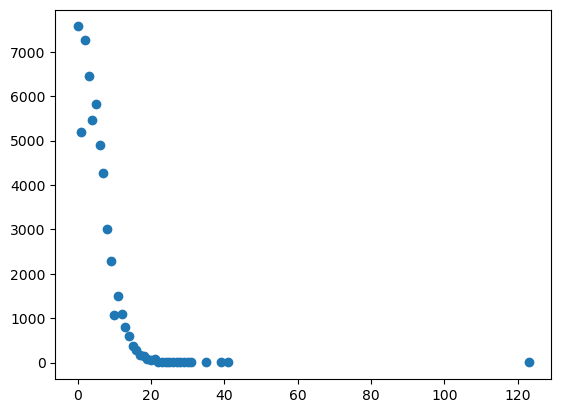

In [258]:
# Visually representing features that may have outliers

count_df = (data2['person_emp_length'].value_counts()).reset_index()
count_df.columns = ['person_emp_length','count']
plt.scatter(count_df['person_emp_length'],count_df['count'] )

print(count_df)

# These two instances are outliers! 
data2[data2['person_emp_length'] > 122 ]

# Drop "Outliers" since it misrepresents data
data2 = data2[data2['person_emp_length'] != 123]

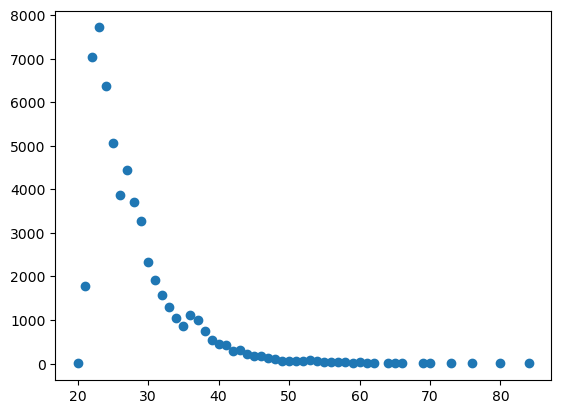

In [260]:
count_df = (data2['person_age'].value_counts()).reset_index()
count_df.columns = ['person_age','count']
plt.scatter(count_df['person_age'],count_df['count'] )

# This person's age is an outlier
data2[data2['person_age'] > 122 ]

# Drop "Outlier" since it misrepresents data
data2 = data2[data2['person_age'] != 123]

In [261]:
data2.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,2,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,1,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,1,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,2,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,2,2.0,3,0,6000,6.92,0.10,0,3,0
